In [172]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

In [3]:
data = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
data.head()

C:\Users\Julian\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [260]:
exclude = ['X', 'Y', 'INCDTTM', 'SEVERITYCODE', 'OBJECTID',
           'INCKEY', 'COLDETKEY', 'INTKEY', 'REPORTNO', 'STATUS',
           'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
           'INCDATE', 'INCDTTM', 'SDOT_COLCODE', 'SDOTCOLNUM', 'ST_COLCODE',
           'SEGLANEKEY', 'CROSSWALKKEY', 'PERSONCOUNT', 'VEHCOUNT']

dacol = ['Column', 'Value', 'Freq1', 'Freq2', 'Per2', 'Per2T', 'PerT']
da = {'Column':[],'Value':[], 'Freq1':[], 'Freq2':[], 'Per2':[], 'Per2T':[], 'PerT':[]}
daf = pd.DataFrame(da,columns = dacol)

nt = len(data)
n2t = len(data[data['SEVERITYCODE'].isin([2])])

for column in data.columns.values.tolist():
    if column not in exclude:
        for unique in data[column].unique().tolist():
        #df_dark0 = df_sev2[~df['LIGHTCOND'].isin(['Daylight'])]
            n1 = len(data[data[column].isin([unique]) & data['SEVERITYCODE'].isin([1])])
            n2 = len(data[data[column].isin([unique]) & data['SEVERITYCODE'].isin([2])])
            lvl2 = 100*(n2/(n1+n2))
            per2T = 100*n2/n2t
            perT = 100*n2/nt
            daf_len = len(daf)
            daf.loc[daf_len]=[column, unique, n1, n2, lvl2, per2T, perT]

In [261]:
daf.sort_values(by=['Per2T', 'PerT'], ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #display(daf)
    #display(daf[daf['Column'].str.contains('PERSONCOUNT')])
    display(daf[daf['Column'].str.contains('ST_COLDESC') | daf['Column'].str.contains('SDOT_COLDESC')])

,Column,Value,Freq1,Freq2,Per2,Per2T,PerT
33,SDOT_COLDESC,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",60871.0,24338.0,28.562711,41.826493,12.501991
35,SDOT_COLDESC,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",36551.0,17748.0,32.685685,30.501134,9.116827
115,ST_COLDESC,Entering at angle,21050.0,13624.0,39.291688,23.413762,6.998402
121,ST_COLDESC,From same direction - both going straight - on...,14403.0,11368.0,44.111598,19.536674,5.839536
43,SDOT_COLDESC,MOTOR VEHCILE STRUCK PEDESTRIAN,665.0,5853.0,89.797484,10.058775,3.006580
124,ST_COLDESC,From opposite direction - one left turn - one ...,5693.0,4631.0,44.856645,7.958686,2.378861
129,ST_COLDESC,Vehicle - Pedalcyclist,579.0,4122.0,87.683472,7.083935,2.117397
127,ST_COLDESC,Fixed object,10263.0,3291.0,24.280655,5.655805,1.690527
126,ST_COLDESC,From same direction - both going straight - bo...,4575.0,3054.0,40.031459,5.248505,1.568785
40,SDOT_COLDESC,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",370.0,2734.0,88.079897,4.698563,1.404406


In [262]:
out = ['OBJECTID', 'INCKEY', 'COLDETKEY', 'INTKEY', 'REPORTNO', 
       'STATUS', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 
       'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'INCDATE',
       'SDOT_COLDESC', 'SDOTCOLNUM', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY']
'''
for column in data[out].columns.values.tolist():
    print(column)
    print(data[column].unique())
    print("")

'''

'\nfor column in data[out].columns.values.tolist():\n    print(column)\n    print(data[column].unique())\n    print("")\n\n'

In [263]:
df = data.drop(out, axis = 1)
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,PEDCOUNT,PEDCYLCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,0,0,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,NaN,N,Overcast,Wet,Daylight,NaN,NaN,10,N
1,1,-122.347294,47.647172,Block,0,0,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,N
2,1,-122.334540,47.607871,Block,0,0,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,NaN,0,Overcast,Dry,Daylight,NaN,NaN,32,N
3,1,-122.334803,47.604803,Block,0,0,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,NaN,N,Clear,Dry,Daylight,NaN,NaN,23,N
4,2,-122.306426,47.545739,Intersection,0,0,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,NaN,0,Raining,Wet,Daylight,NaN,NaN,10,N


In [264]:
#df.describe(include = 'all')
#df.describe()

In [265]:
df['X'].replace(np.nan, df['X'].mean(), inplace = True)
df['Y'].replace(np.nan, df['Y'].mean(), inplace = True)
df['ADDRTYPE'].replace(np.nan, 'Unknown', inplace = True)
df['JUNCTIONTYPE'].replace(np.nan, 'Unknown', inplace = True)
df['INATTENTIONIND'].replace(np.nan, 0, inplace = True)
df['INATTENTIONIND'].replace('Y', 1, inplace = True)
df['UNDERINFL'].replace(np.nan, 0, inplace = True)
df['UNDERINFL'].replace(['N', '0'], 0, inplace = True)
df['UNDERINFL'].replace(['Y', '1'], 1, inplace = True)
df['WEATHER'].replace(np.nan, 'Unknown', inplace = True)
df['ROADCOND'].replace(np.nan, 'Unknown', inplace = True)
df['LIGHTCOND'].replace(np.nan, 'Unknown', inplace = True)
df['SPEEDING'].replace(np.nan, 0, inplace = True)
df['SPEEDING'].replace('Y', 1, inplace = True)
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['HOURDAY'] = df['INCDTTM'].dt.hour
df['DAYWEEK'] = df['INCDTTM'].dt.dayofweek
df['MONTH'] = df['INCDTTM'].dt.month
df['PEDROWNOTGRNT'].replace(np.nan, 0, inplace = True)
df['PEDROWNOTGRNT'].replace('Y', 1, inplace = True)
df['HITPARKEDCAR'].replace(['N', '0'], 0, inplace = True)
df['HITPARKEDCAR'].replace(['Y', '1'], 1, inplace = True)
df['ST_COLCODE'].replace(' ', 31, inplace=True)
df['ST_COLCODE'].replace(np.nan, 31, inplace=True)
df['ST_COLCODE'] = df['ST_COLCODE'].astype('int')
df['PEDNUM'] = df['PEDCOUNT']+df['PEDCYLCOUNT']
df.loc[df['PEDNUM'] > 0, 'PEDNUM'] = 1


nan = df.isnull()
for column in nan.columns.values.tolist():
    print(column)
    print(nan[column].value_counts())
    print("")    
    

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    194673
Name: X, dtype: int64

Y
False    194673
Name: Y, dtype: int64

ADDRTYPE
False    194673
Name: ADDRTYPE, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

JUNCTIONTYPE
False    194673
Name: JUNCTIONTYPE, dtype: int64

SDOT_COLCODE
False    194673
Name: SDOT_COLCODE, dtype: int64

INATTENTIONIND
False    194673
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    194673
Name: UNDERINFL, dtype: int64

WEATHER
False    194673
Name: WEATHER, dtype: int64

ROADCOND
False    194673
Name: ROADCOND, dtype: int64

LIGHTCOND
False    194673
Name: LIGHTCOND, dtype: int64

PEDROWNOTGRNT
False    194673
Name: PEDROWNOTGRNT, dtype: int64

SPEEDING
False    194673
Name: SPEEDING, dtype: int64

ST_COLCODE
False    194673
Name: ST_COLCODE, dtype: int64

HITPARKEDCAR
False    194673
Name: HI

In [266]:
df.drop(['INCDTTM', 'PEDCYLCOUNT', 'PEDCOUNT'], axis = 1, inplace = True)

In [267]:
for column in df.columns.values.tolist():
    print(column)
    print(df[column].unique())
    print("")

SEVERITYCODE
[2 1]

X
[-122.3231484 -122.3472943 -122.33454   ... -122.3927543 -122.3042172
 -122.3616722]

Y
[47.70314032 47.64717249 47.60787143 ... 47.51527348 47.6695375
 47.55672231]

ADDRTYPE
['Intersection' 'Block' 'Alley' 'Unknown']

JUNCTIONTYPE
['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driveway Junction'
 'Mid-Block (but intersection related)'
 'At Intersection (but not related to intersection)' 'Unknown'
 'Ramp Junction']

SDOT_COLCODE
[11 16 14 51 13 26 28 18 34  0 24 69 12 21 23 29 27 48 15 55 33 56 54 31
 44 32 25 66 36 64 22 58 47 61 35 53 46 68 52]

INATTENTIONIND
[0 1]

UNDERINFL
[0 1]

WEATHER
['Overcast' 'Raining' 'Clear' 'Unknown' 'Other' 'Snowing' 'Fog/Smog/Smoke'
 'Sleet/Hail/Freezing Rain' 'Blowing Sand/Dirt' 'Severe Crosswind'
 'Partly Cloudy']

ROADCOND
['Wet' 'Dry' 'Unknown' 'Snow/Slush' 'Ice' 'Other' 'Sand/Mud/Dirt'
 'Standing Water' 'Oil']

LIGHTCOND
['Daylight' 'Dark - Street Lights On' 'Dark - No Street Lights' '

In [268]:
exclude = ['X', 'Y', 'INCDTTM', 'SEVERITYCODE']

dacol = ['Column', 'Value', 'Freq1', 'Freq2', 'Per2', 'Per2T', 'PerT']
da = {'Column':[],'Value':[],'Freq1':[],'Freq2':[], 'Per2':[], 'Per2T':[], 'PerT':[]}
daf = pd.DataFrame(da,columns = dacol)

nt = len(data)
n2t = len(data[data['SEVERITYCODE'].isin([2])])

for column in df.columns.values.tolist():
    if column not in exclude:
        for unique in df[column].unique().tolist():
        #df_dark0 = df_sev2[~df['LIGHTCOND'].isin(['Daylight'])]
            n1 = len(df[df[column].isin([unique]) & df['SEVERITYCODE'].isin([1])])
            n2 = len(df[df[column].isin([unique]) & df['SEVERITYCODE'].isin([2])])
            lvl2 = 100*(n2/(n1+n2))
            per2T = 100*n2/n2t
            perT = 100*n2/nt
            daf_len = len(daf)
            daf.loc[daf_len]=[column, unique, n1, n2, lvl2, per2T, perT]

In [269]:
daf.sort_values(by=['Per2T', 'PerT'], ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #display(daf)
    #display(daf[~daf['Column'].str.contains('ST_COLCODE') & ~daf['Column'].str.contains('SDOT_COLCODE')])
    #display(daf[daf['Column'].str.contains('WEATHER|ROADCOND')])
    #display(daf[daf['Column'].str.contains('HOUR')])
    display(daf[daf['Column'].str.contains('ST_COLCODE') | daf['Column'].str.contains('SDOT_COLCODE')])

,Column,Value,Freq1,Freq2,Per2,Per2T,PerT
11,SDOT_COLCODE,11,60871.0,24338.0,28.562711,41.826493,12.501991
13,SDOT_COLCODE,14,36551.0,17748.0,32.685685,30.501134,9.116827
87,ST_COLCODE,10,21050.0,13624.0,39.291688,23.413762,6.998402
93,ST_COLCODE,14,14403.0,11368.0,44.111598,19.536674,5.839536
21,SDOT_COLCODE,24,665.0,5853.0,89.797484,10.058775,3.006580
96,ST_COLCODE,28,5693.0,4631.0,44.856645,7.958686,2.378861
101,ST_COLCODE,45,579.0,4122.0,87.683472,7.083935,2.117397
99,ST_COLCODE,50,10263.0,3291.0,24.280655,5.655805,1.690527
98,ST_COLCODE,13,4575.0,3054.0,40.031459,5.248505,1.568785
18,SDOT_COLCODE,18,370.0,2734.0,88.079897,4.698563,1.404406


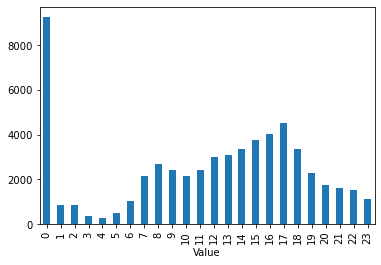

In [270]:
dfh = daf[daf['Column'].str.contains('HOURDAY')].sort_values('Value')
dfh.set_index('Value', inplace = True)
p = dfh['Freq2']
p.plot(kind = 'bar')

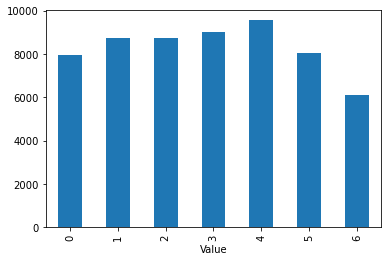

In [271]:
dfh = daf[daf['Column'].str.contains('DAYWEEK')].sort_values('Value')
dfh.set_index('Value', inplace = True)
p = dfh['Freq2']
p.plot(kind = 'bar')

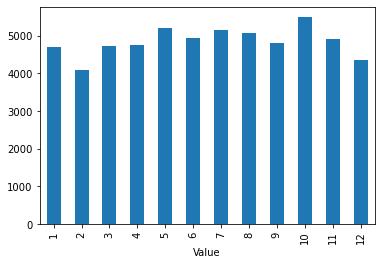

In [272]:
dfh = daf[daf['Column'].str.contains('MONTH')].sort_values('Value')
dfh.set_index('Value', inplace = True)
p = dfh['Freq2']
p.plot(kind = 'bar')

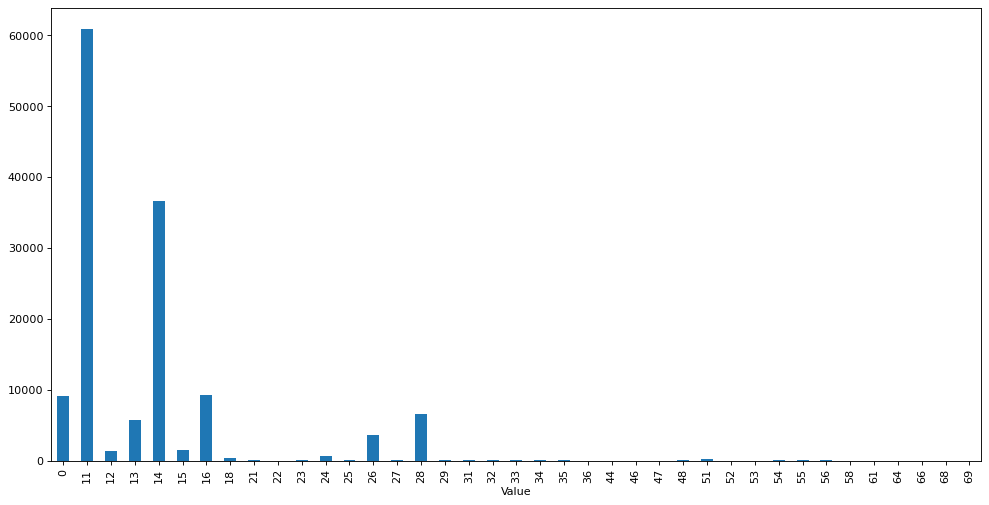

In [273]:
figure(num=None, figsize=(fs, fs*0.5), dpi=80, facecolor='w', edgecolor='k')
dfh = daf[daf['Column'].str.contains('SDOT_COLCODE')].sort_values('Value')
dfh.set_index('Value', inplace = True)
p = dfh['Freq1']
p.plot(kind = 'bar')

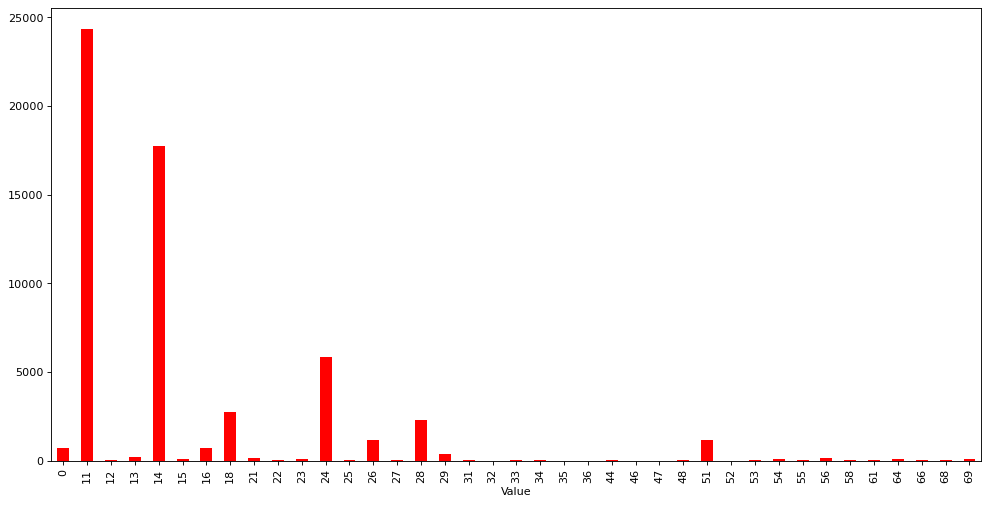

In [276]:
figure(num=None, figsize=(fs, fs*0.5), dpi=80, facecolor='w', edgecolor='k')
dfh = daf[daf['Column'].str.contains('SDOT_COLCODE')].sort_values('Value')
dfh.set_index('Value', inplace = True)
p = dfh['Freq2']
p.plot(kind = 'bar', color = 'r')

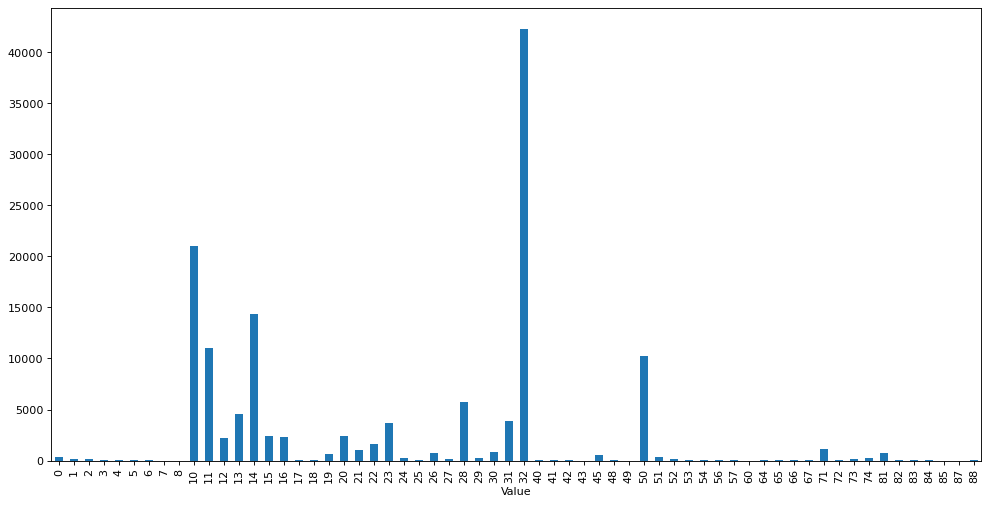

In [274]:
figure(num=None, figsize=(fs, fs*0.5), dpi=80, facecolor='w', edgecolor='k')
dfh = daf[daf['Column'].str.contains('ST_COLCODE')].sort_values('Value')
dfh.set_index('Value', inplace = True)
p = dfh['Freq1']
p.plot(kind = 'bar')

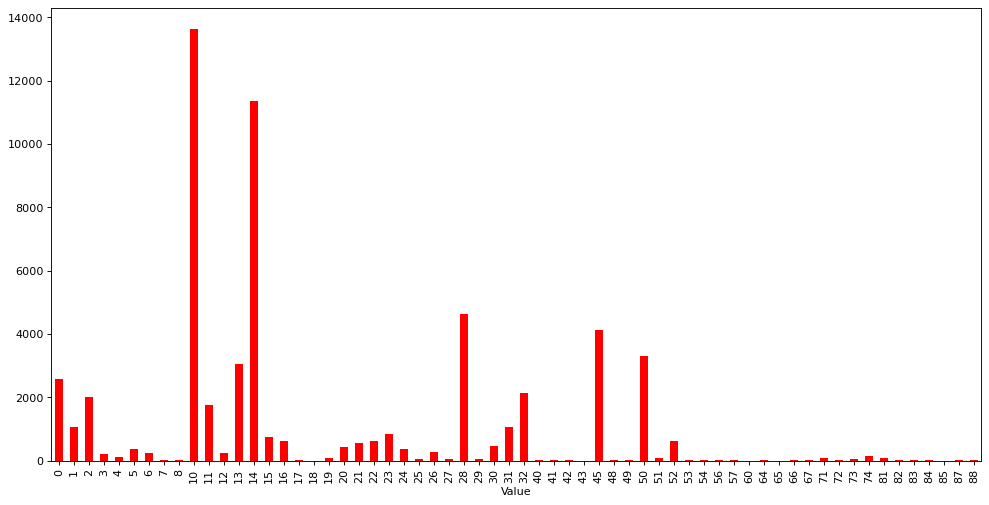

In [275]:
figure(num=None, figsize=(fs, fs*0.5), dpi=80, facecolor='w', edgecolor='k')
dfh = daf[daf['Column'].str.contains('ST_COLCODE')].sort_values('Value')
dfh.set_index('Value', inplace = True)
p = dfh['Freq2']
p.plot(kind = 'bar', color = 'r')

In [244]:
df_test = df.groupby(['SEVERITYCODE'])['HOURDAY'].value_counts()

In [245]:
df_sev2 = df[df['SEVERITYCODE'] == 2]
df_sev1 = df[df['SEVERITYCODE'] == 1]
print(len(df_sev2),len(df_sev1))

58188 136485


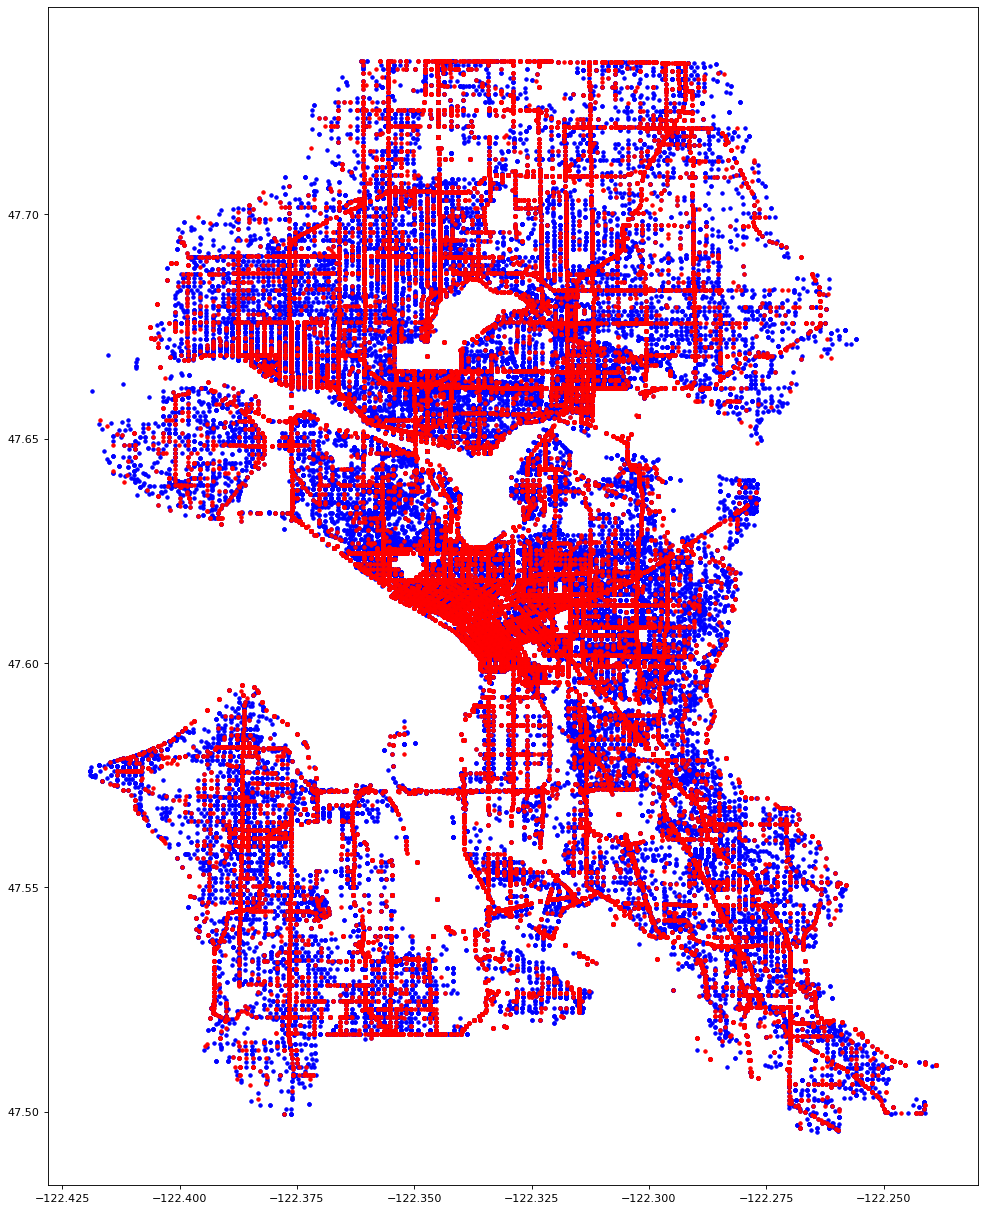

In [246]:
fs = 15
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_sev1['X'], df_sev1['Y'], marker='.', color = 'b')
plt.scatter(df_sev2['X'], df_sev2['Y'], marker='.', color = 'r')
plt.show()

<ipython-input-247-fcd51453ee54>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_spe1 = df_sev2[df['HITPARKEDCAR'] == 1]


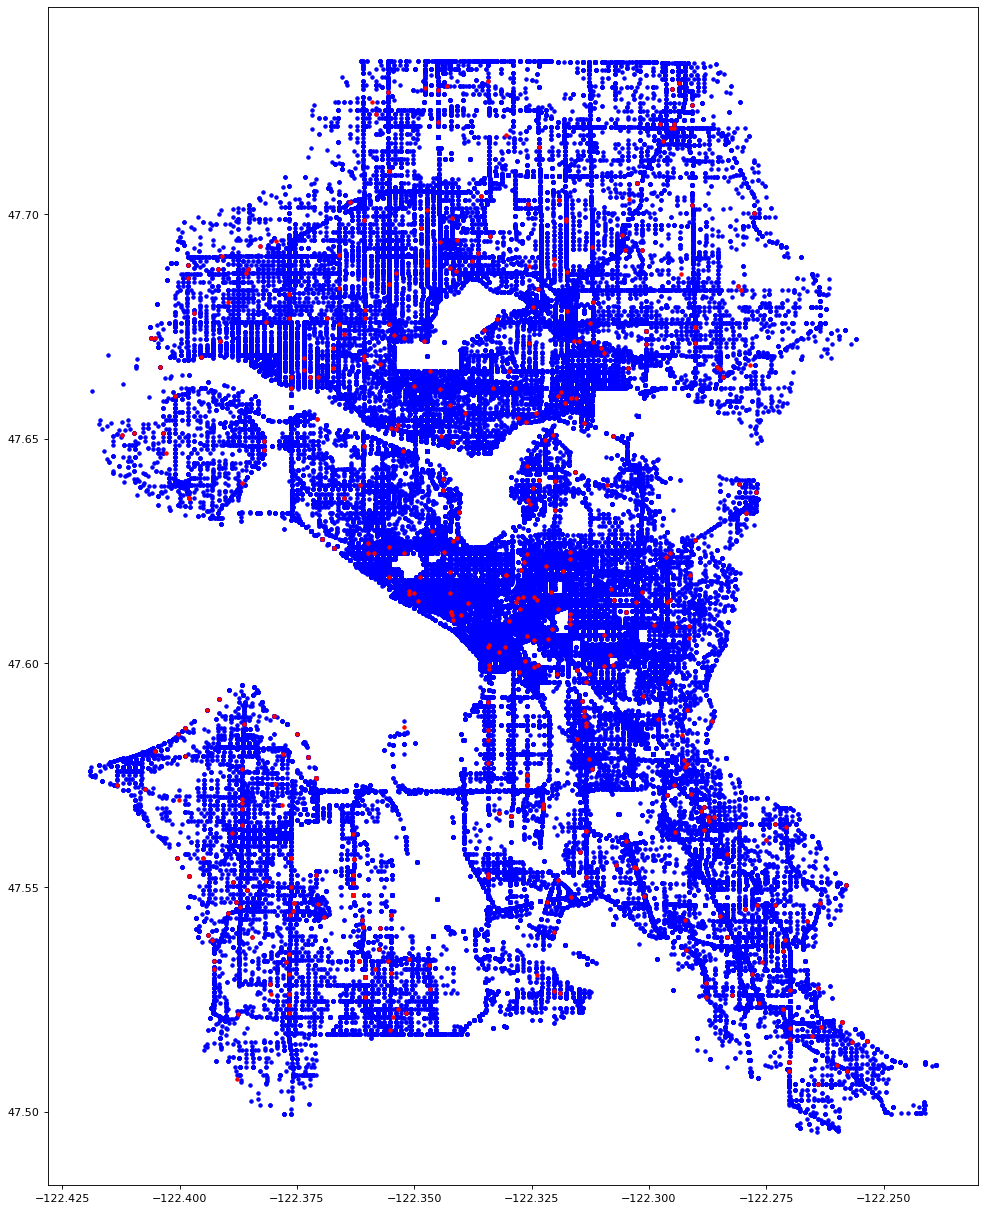

In [247]:
df_spe1 = df_sev2[df['HITPARKEDCAR'] == 1]
df_spe0 = df[df['HITPARKEDCAR'] == 0]
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_spe0['X'], df_spe0['Y'], marker='.', color = 'b')
plt.scatter(df_spe1['X'], df_spe1['Y'], marker='.', color = 'r')
plt.show()

In [248]:
display(df_spe1)

,SEVERITYCODE,X,Y,ADDRTYPE,JUNCTIONTYPE,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,HITPARKEDCAR,HOURDAY,DAYWEEK,MONTH,PEDNUM
784,2,-122.290748,47.702084,Block,Mid-Block (not related to intersection),14,1,0,Clear,Dry,Dark - Street Lights On,0,0,32,1,20,4,4,0
1688,2,-122.376761,47.676820,Block,Mid-Block (not related to intersection),14,0,0,Clear,Dry,Daylight,0,0,32,1,14,4,6,0
2321,2,-122.304990,47.611474,Block,Mid-Block (not related to intersection),14,0,0,Unknown,Unknown,Unknown,0,0,31,1,0,5,3,0
2577,2,-122.277071,47.546018,Block,Mid-Block (not related to intersection),14,0,0,Raining,Wet,Dark - Street Lights On,0,1,32,1,19,5,12,0
3279,2,-122.355298,47.684382,Block,Unknown,0,0,0,Clear,Dry,Daylight,0,0,45,1,13,4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194180,2,-122.344947,47.720482,Block,Mid-Block (not related to intersection),11,1,0,Overcast,Wet,Dusk,0,0,32,1,15,2,11,0
194540,2,-122.354903,47.543796,Block,Mid-Block (not related to intersection),14,0,1,Clear,Dry,Dark - Street Lights On,0,0,32,1,19,2,12,0
194615,2,-122.387469,47.521817,Block,Mid-Block (not related to intersection),14,0,1,Clear,Dry,Dark - Street Lights On,0,0,32,1,19,3,12,0
194650,2,-122.355298,47.684382,Block,Mid-Block (not related to intersection),14,0,0,Clear,Dry,Daylight,0,0,32,1,8,6,1,0


<ipython-input-249-67c2cfbf473c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_uin1 = df_sev2[df['UNDERINFL'] == 1]


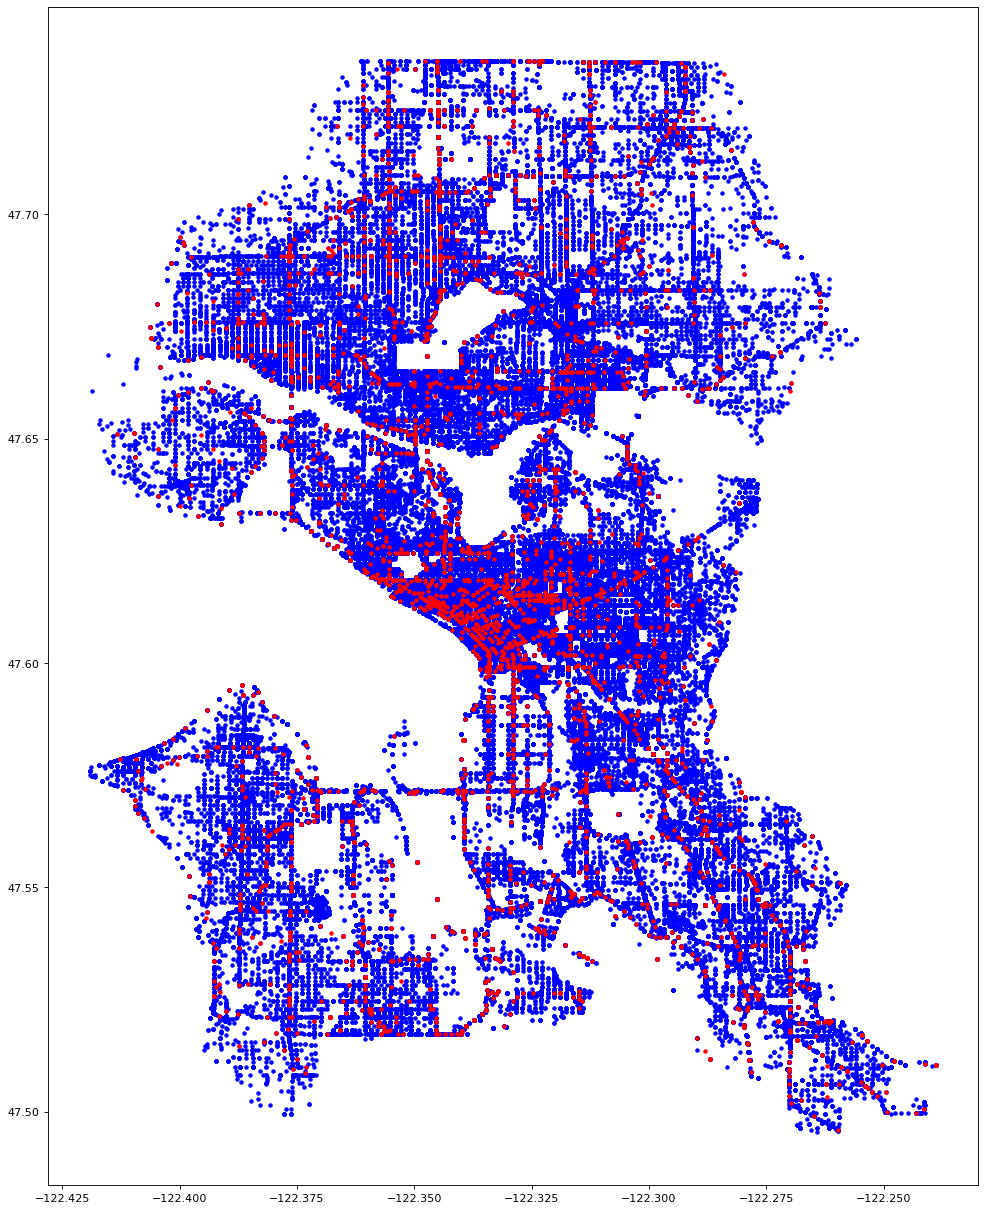

In [249]:
df_uin1 = df_sev2[df['UNDERINFL'] == 1]
df_uin0 = df[df['UNDERINFL'] == 0]
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_uin0['X'], df_uin0['Y'], marker='.', color = 'b')
plt.scatter(df_uin1['X'], df_uin1['Y'], marker='.', color = 'r')
plt.show()

<ipython-input-250-480ab13bc114>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_iat1 = df_sev2[df['INATTENTIONIND'] == 1]


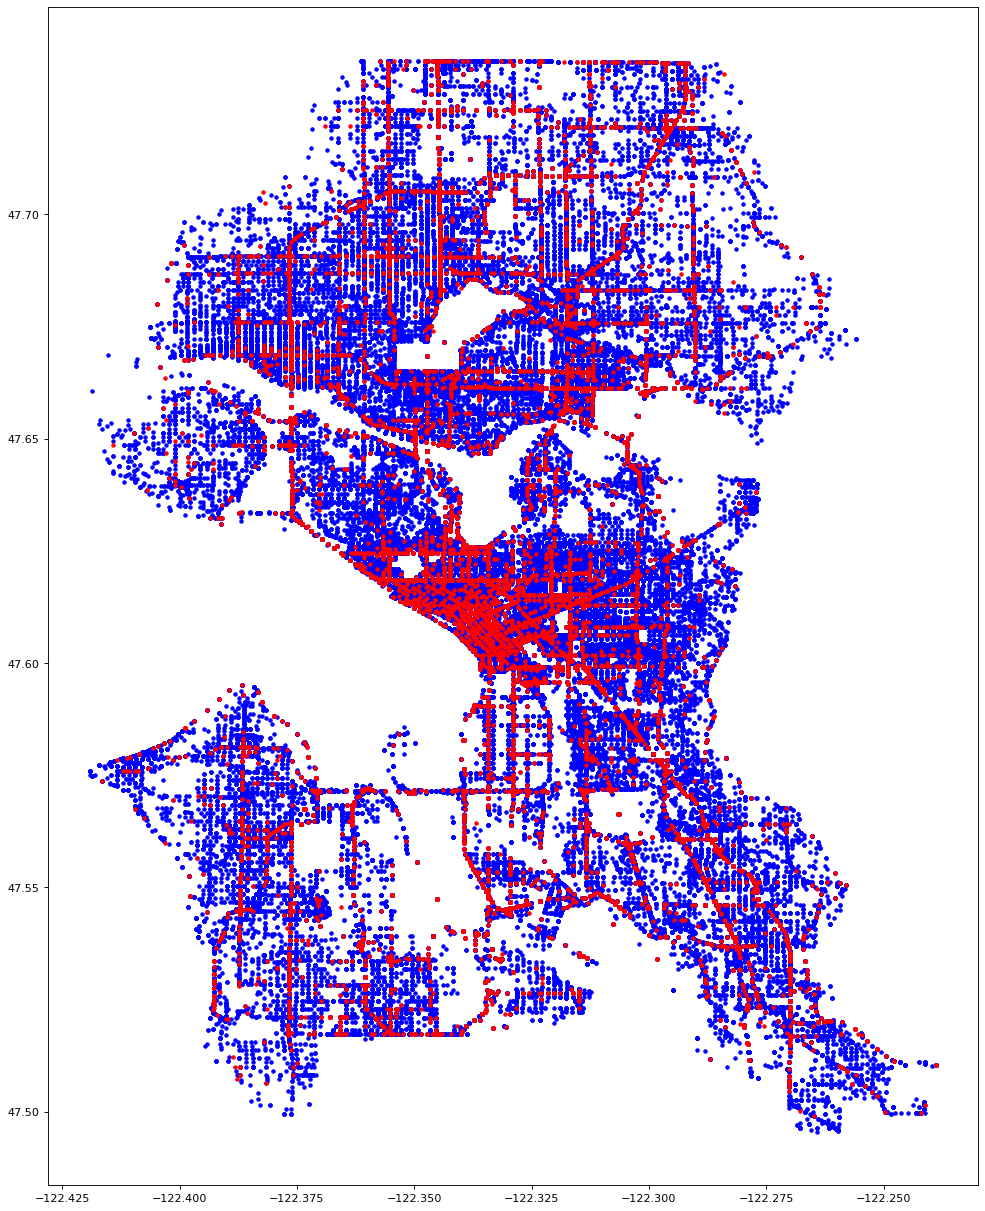

In [250]:
df_iat1 = df_sev2[df['INATTENTIONIND'] == 1]
df_iat0 = df[df['INATTENTIONIND'] == 0]
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_iat0['X'], df_iat0['Y'], marker='.', color = 'b')
plt.scatter(df_iat1['X'], df_iat1['Y'], marker='.', color = 'r')
plt.show()

<ipython-input-251-8ee9816d0257>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dark0 = df_sev2[~df['LIGHTCOND'].isin(['Daylight'])]


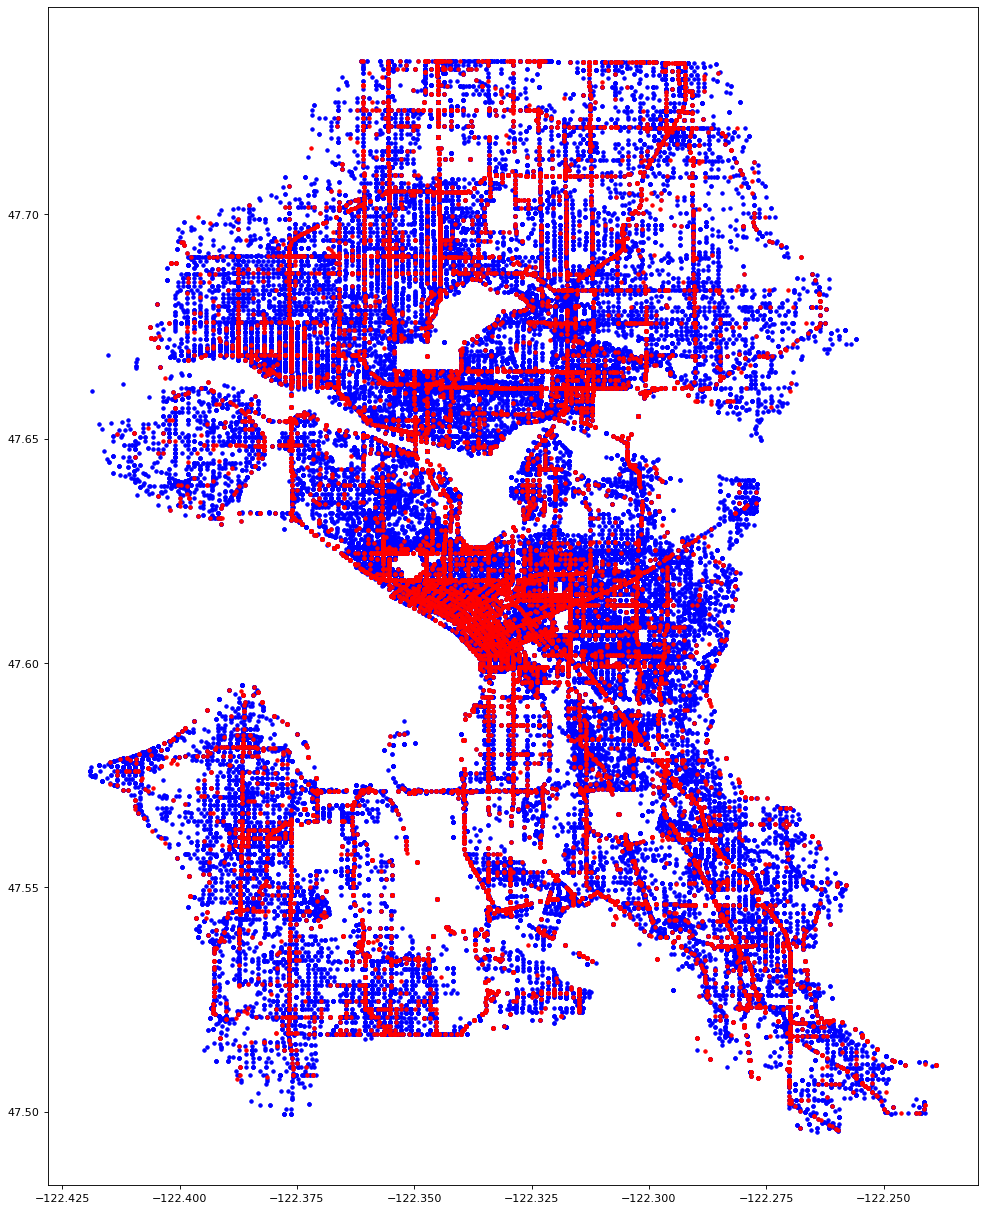

In [251]:
df_dark0 = df_sev2[~df['LIGHTCOND'].isin(['Daylight'])]
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_sev1['X'], df_sev1['Y'], marker='.', color = 'b')
plt.scatter(df_dark0['X'], df_dark0['Y'], marker='.', color = 'r')
plt.show()

<ipython-input-252-0cffad45d71f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dark = df_sev2[df['JUNCTIONTYPE'].str.contains('Intersection|Mid-Block')]


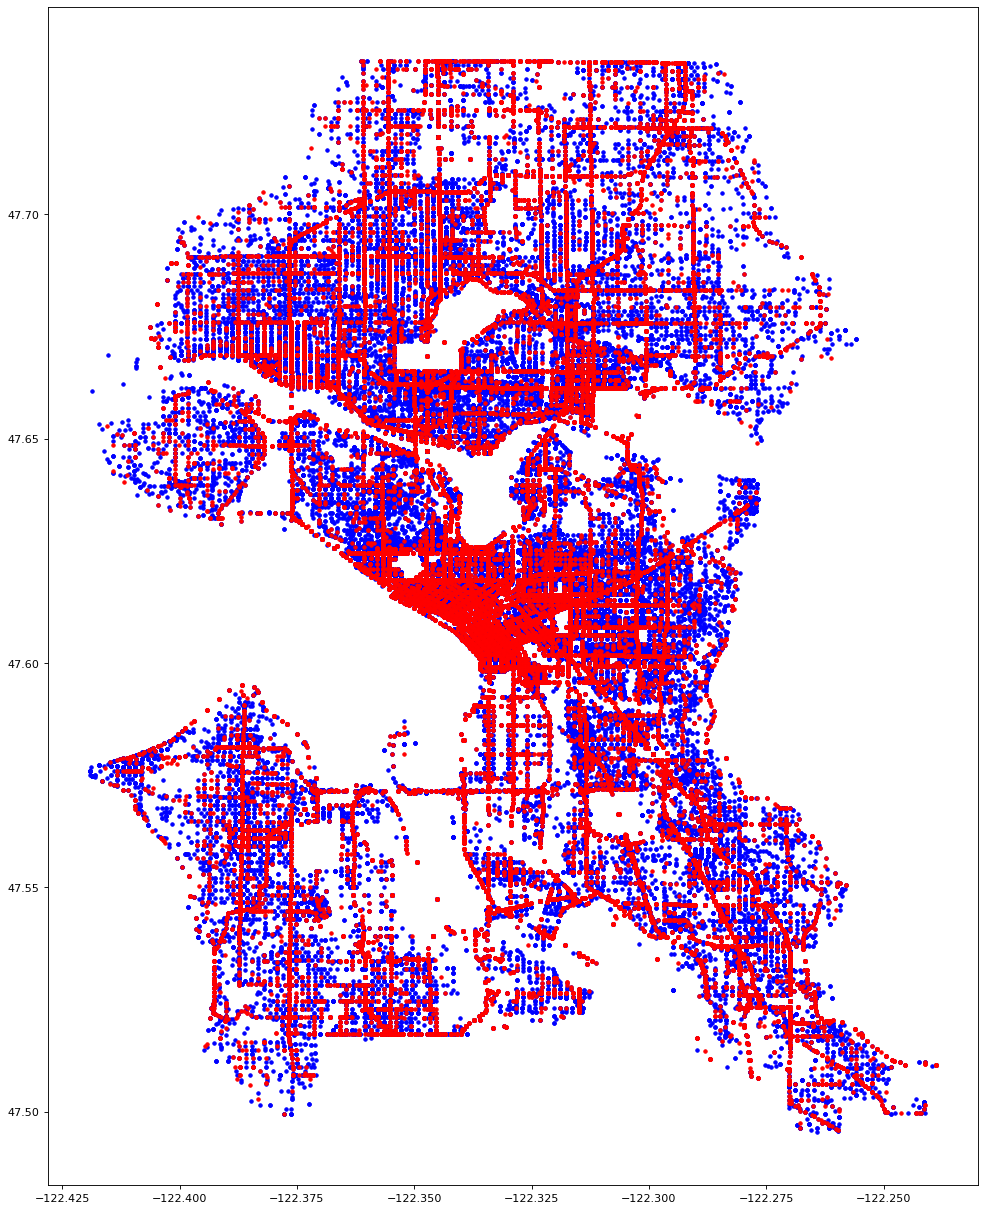

In [252]:
df_dark = df_sev2[df['JUNCTIONTYPE'].str.contains('Intersection|Mid-Block')]
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_sev1['X'], df_sev1['Y'], marker='.', color = 'b')
plt.scatter(df_dark['X'], df_dark['Y'], marker='.', color = 'r')
plt.show()

<ipython-input-253-f5ed72fa23c6>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_dark0 = df_sev2[df['DAYWEEK'].isin([0,1,2,3,4,5,6])]


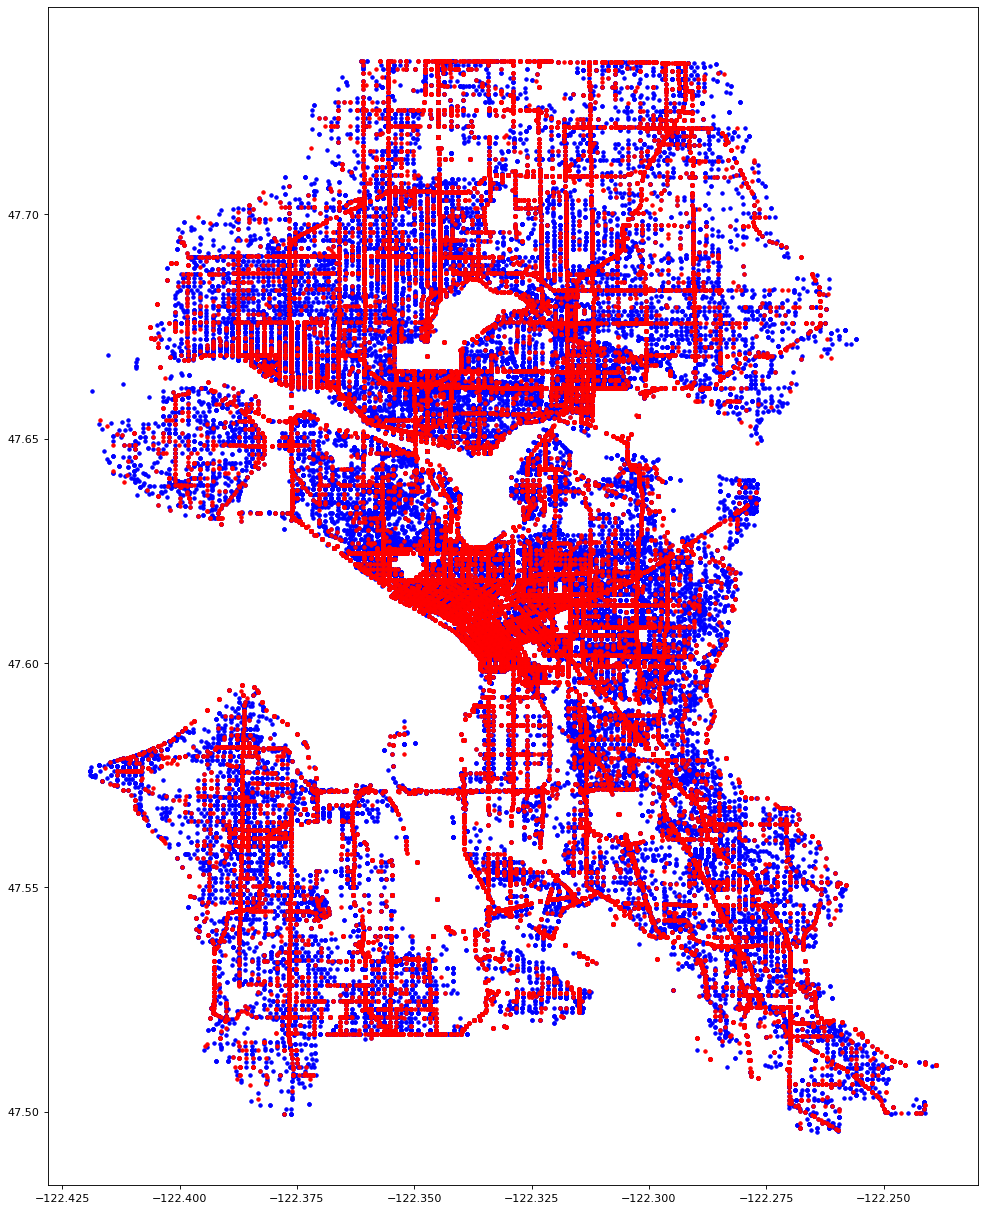

In [253]:
df_dark0 = df_sev2[df['DAYWEEK'].isin([0,1,2,3,4,5,6])]
figure(num=None, figsize=(fs, fs*1.3), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df_sev1['X'], df_sev1['Y'], marker='.', color = 'b')
plt.scatter(df_dark0['X'], df_dark0['Y'], marker='.', color = 'r')
plt.show()

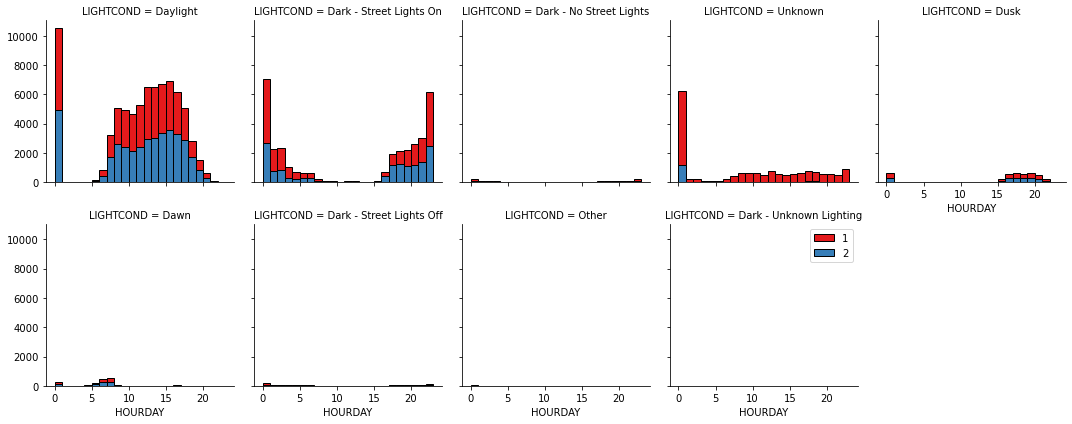

In [254]:
bins=np.linspace(df.HOURDAY.min(), df.HOURDAY.max(), 24)
g = sns.FacetGrid(df, col="LIGHTCOND", hue="SEVERITYCODE", palette="Set1", col_wrap=5)
g.map(plt.hist, 'HOURDAY', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [255]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE', 'HITPARKEDCAR', 'HOURDAY',
       'DAYWEEK', 'MONTH', 'PEDNUM'],
      dtype='object')